In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/the-true-cost-of-fast-fashion-impact/true_cost_fast_fashion.csv")

In [3]:
df.head()

Brand    Country  Year  Monthly_Production_Tonnes  Avg_Item_Price_USD  \
0       Shein  Indonesia  2017                     574.51               19.31   
1  Forever 21    Vietnam  2024                     394.50                9.30   
2      Uniqlo      India  2024                     310.23               25.46   
3  Forever 21        USA  2017                     218.65               13.17   
4        Zara  Indonesia  2016                    1005.84               15.40   

   Release_Cycles_Per_Year  Carbon_Emissions_tCO2e  \
0                       16                11421.58   
1                       20                 5571.01   
2                       11                10969.00   
3                       13                13093.00   
4                       20                 9548.40   

   Water_Usage_Million_Litres  Landfill_Waste_Tonnes  Avg_Worker_Wage_USD  \
0                      282.11                 616.63               143.79   
1                      289.22                 795.11               167.78   
2                      116.39                 364.33                97.81   
3                      255.88                 632.16               134.54   
4                      142.07                 830.10               144.33   

   ...  Instagram_Mentions_Thousands  TikTok_Mentions_Thousands  \
0  ...                          4655                       3435   
1  ...                          9655                       6285   
2  ...                          8016                        387   
3  ...                          8254                       1620   
4  ...                          1778                       3292   

   Sentiment_Score  Social_Sentiment_Label  GDP_Contribution_Million_USD  \
0             0.05                 Neutral                        608.51   
1            -0.12                Positive                        689.49   
2             0.08                 Neutral                        439.78   
3            -0.06                 Neutral                        746.70   
4            -0.59                 Neutral                        571.42   

   Env_Cost_Index  Sustainability_Score  Transparency_Index Compliance_Score  \
0            0.49                 29.12               61.19            13.95   
1            0.21                 49.52                3.44            90.93   
2            0.63                 96.53               60.70            27.60   
3            0.21                 71.32               76.08            56.13   
4            0.95                 59.89               69.48            88.05   

   Ethical_Rating  
0            1.46  
1            1.29  
2            1.48  
3            3.85  
4            3.12  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         3000 non-null   object 
 1   Country                       3000 non-null   object 
 2   Year                          3000 non-null   int64  
 3   Monthly_Production_Tonnes     3000 non-null   float64
 4   Avg_Item_Price_USD            3000 non-null   float64
 5   Release_Cycles_Per_Year       3000 non-null   int64  
 6   Carbon_Emissions_tCO2e        3000 non-null   float64
 7   Water_Usage_Million_Litres    3000 non-null   float64
 8   Landfill_Waste_Tonnes         3000 non-null   float64
 9   Avg_Worker_Wage_USD           3000 non-null   float64
 10  Working_Hours_Per_Week        3000 non-null   int64  
 11  Child_Labor_Incidents         3000 non-null   int64  
 12  Return_Rate_Percent           3000 non-null   float64
 13  Avg

In [5]:
df.describe()

Year  Monthly_Production_Tonnes  Avg_Item_Price_USD  \
count  3000.000000                3000.000000         3000.000000   
mean   2019.529667                 497.319890           19.936187   
std       2.894002                 149.543176            4.919126   
min    2015.000000                   3.820000            1.090000   
25%    2017.000000                 396.360000           16.540000   
50%    2020.000000                 495.535000           19.890000   
75%    2022.000000                 596.800000           23.320000   
max    2024.000000                1005.840000           36.460000   

       Release_Cycles_Per_Year  Carbon_Emissions_tCO2e  \
count              3000.000000             3000.000000   
mean                 17.757333            10003.873717   
std                   6.981358             3017.980553   
min                   6.000000              206.090000   
25%                  12.000000             7892.112500   
50%                  18.000000             9926.940000   
75%                  24.000000            12012.625000   
max                  29.000000            19585.470000   

       Water_Usage_Million_Litres  Landfill_Waste_Tonnes  Avg_Worker_Wage_USD  \
count                 3000.000000            3000.000000          3000.000000   
mean                   200.924420             795.028837           149.817727   
std                     60.483385             201.440989            49.792421   
min                    -38.060000              58.240000           -52.700000   
25%                    160.317500             655.840000           116.692500   
50%                    200.315000             799.995000           149.695000   
75%                    240.662500             934.147500           183.747500   
max                    403.830000            1480.380000           326.450000   

       Working_Hours_Per_Week  Child_Labor_Incidents  ...  \
count             3000.000000            3000.000000  ...   
mean                54.695000               0.997000  ...   
std                  8.648675               1.005648  ...   
min                 40.000000               0.000000  ...   
25%                 47.000000               0.000000  ...   
50%                 55.000000               1.000000  ...   
75%                 62.000000               2.000000  ...   
max                 69.000000               5.000000  ...   

       Shopping_Frequency_Per_Year  Instagram_Mentions_Thousands  \
count                  3000.000000                   3000.000000   
mean                     11.008333                   5054.240667   
std                       4.909613                   2858.367381   
min                       3.000000                    110.000000   
25%                       7.000000                   2558.750000   
50%                      11.000000                   5055.500000   
75%                      15.000000                   7499.250000   
max                      19.000000                   9998.000000   

       TikTok_Mentions_Thousands  Sentiment_Score  \
count                3000.000000      3000.000000   
mean                 3975.165667         0.001597   
std                  2268.386606         0.579073   
min                    54.000000        -1.000000   
25%                  2046.250000        -0.490000   
50%                  3946.500000         0.010000   
75%                  5854.250000         0.500000   
max                  7995.000000         1.000000   

       GDP_Contribution_Million_USD  Env_Cost_Index  Sustainability_Score  \
count                   3000.000000     3000.000000           3000.000000   
mean                     503.092523        0.555630             49.854920   
std                      195.961926        0.263294             28.627411   
min                      -96.430000        0.100000              0.010000   
25%                      369.370000        0.330000             25.322500   
50%                      503.990000 

In [6]:
df.describe(include="object")

Brand Country Social_Sentiment_Label
count   3000    3000                   3000
unique     5      10                      3
top      H&M   India                Neutral
freq     650     314                   1027

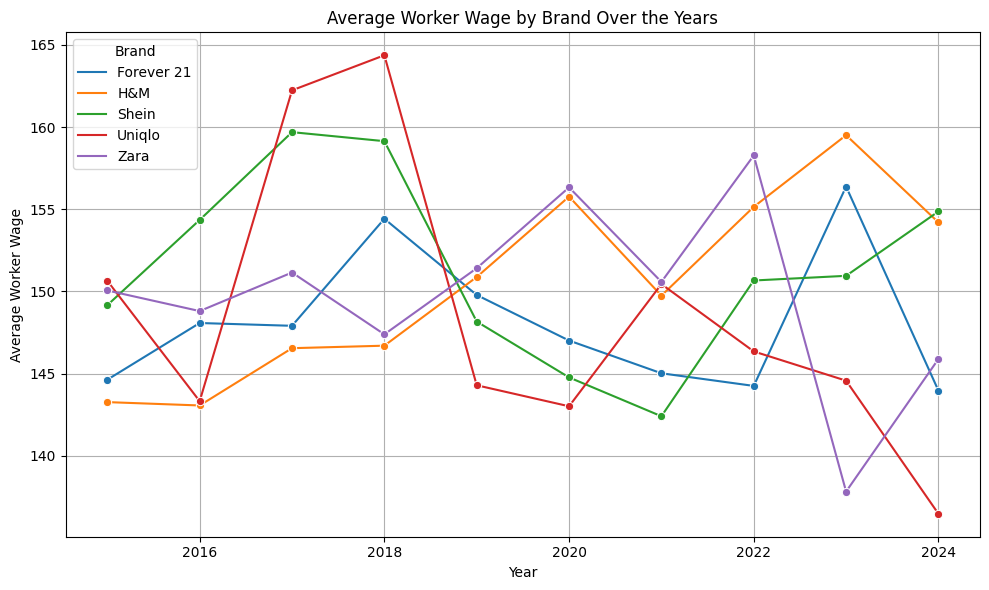

In [7]:
# Avg Worker Wage by Brand over the years

grouped = df.groupby(['Brand', 'Year'])['Avg_Worker_Wage_USD'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Year', y='Avg_Worker_Wage_USD', hue='Brand', marker='o')

plt.title('Average Worker Wage by Brand Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Worker Wage')
plt.legend(title='Brand')
plt.grid(True)
plt.tight_layout()
plt.show()

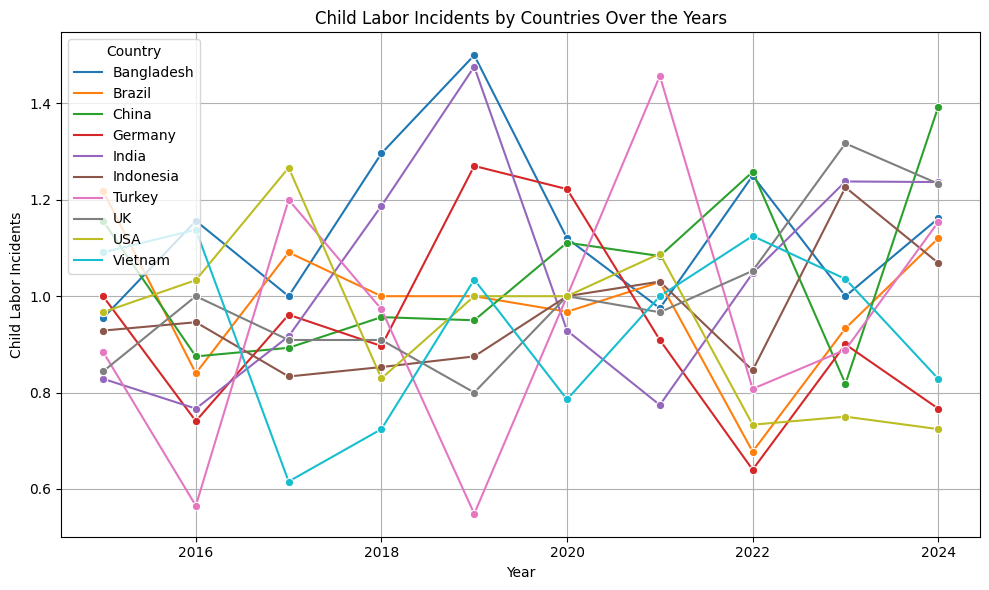

In [8]:
# Child Labor incidents by Countries over the Years

grouped = df.groupby(['Country', 'Year'])['Child_Labor_Incidents'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='Year', y='Child_Labor_Incidents', hue='Country', marker='o')

plt.title('Child Labor Incidents by Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Child Labor Incidents')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

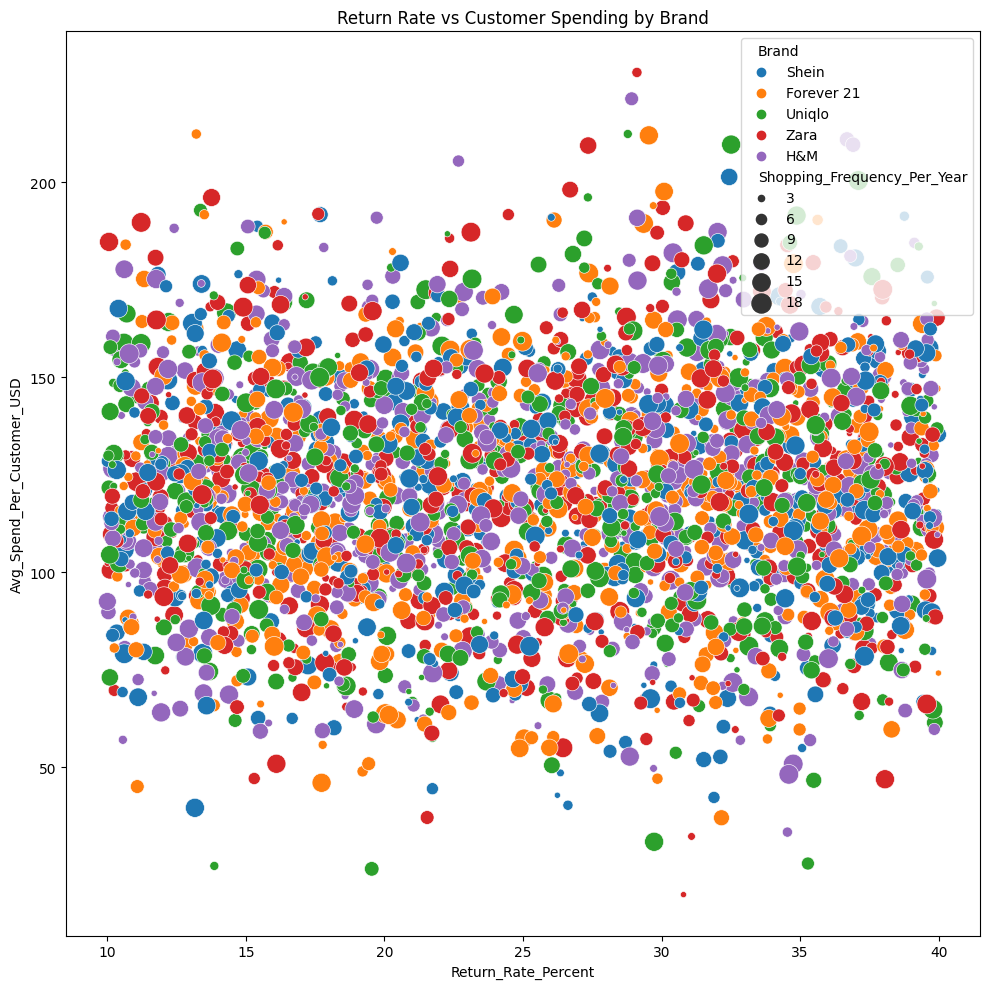

In [9]:
# Return Rate vs Customer Spending by Brand
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='Return_Rate_Percent', y='Avg_Spend_Per_Customer_USD', hue='Brand', size='Shopping_Frequency_Per_Year', sizes=(20, 200))
plt.title('Return Rate vs Customer Spending by Brand')
plt.tight_layout()
plt.show()

In [ ]:
# Sustainability Score vs. Carbon Emissions
sns.scatterplot(data=df, x='Sustainability_Score', y='Carbon_Emissions_tCO2e', hue='Brand')
plt.title('Sustainability Score vs Carbon Emissions')
plt.show()

In [ ]:
# Water Usage vs. Landfill Waste (Environmental Impact Plot)
sns.scatterplot(data=df, x='Water_Usage_Million_Litres', y='Landfill_Waste_Tonnes', hue='Brand', size='Monthly_Production_Tonnes', sizes=(20, 200))
plt.title('Water Usage vs Landfill Waste by Brand')
plt.show()

In [ ]:
# Child Labor Incidents Over Years
sns.lineplot(data=df, x='Year', y='Child_Labor_Incidents', hue='Brand', marker='o')
plt.title('Child Labor Incidents by Brand Over Years')
plt.show()

In [ ]:
# Avg Spend Per Customer vs. Sentiment Score
# 👉 Does positive sentiment drive higher spending?
sns.scatterplot(data=df, x='Sentiment_Score', y='Avg_Spend_Per_Customer_USD', hue='Brand')
plt.title('Customer Spend vs Sentiment Score')
plt.show()

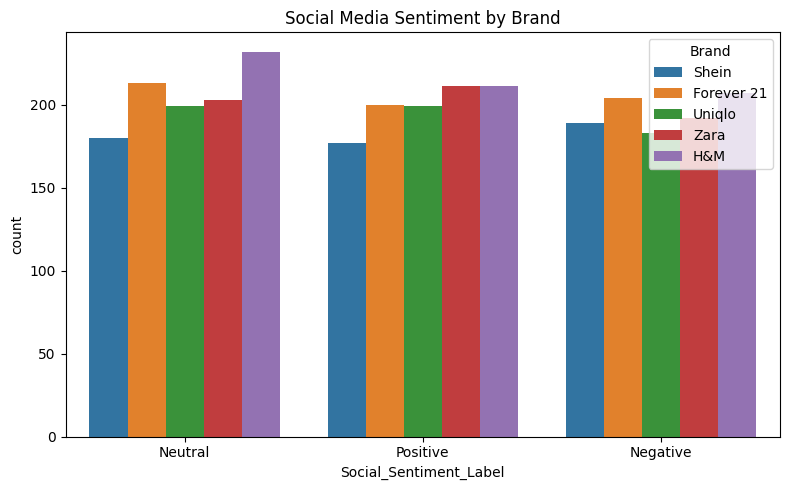

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Social_Sentiment_Label', hue='Brand')
plt.title('Social Media Sentiment by Brand')
plt.tight_layout()
plt.show()